 # Analysis of Transportation Network Companies (TNCs) and Taxis in Chicago
 ## Performing a hotspot (Getis-Ord Gi*) analysis
 This notebook performs a hotspot (Getis-Ord Gi*) analysis on the selected Taxi and TNC data for Chicago. The starting datasets for this notebook were generated by selecting one week of trips for each dataset: for the TNCs the selected week is November 5 - November 11, 2019; for the taxi trips, the selected week is November 7 - November 13, 2016.

 A project by:<br><br>
 Juan Francisco Saldarriaga<br>
 Senior Data and Design Researcher<br>
 Brown Institute for Media Innovation<br>
 School of Journalism, Columbia University<br>
 jfs2118@columbia.edu<br>
 <br>
 and<br><br>
 David King<br>
 School of Geographical Sciences and Urban Planning<br>
 Faculty Advisor, Barrett Honors College<br>
 Arizona State University<br>
 david.a.king@asu.edu<br>

 The original data for this project can be found at:
 * Taxi trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew), accessed on June 12, 2019.
 * TNC trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p), accessed on April 26, 2019.
 * Chicago census tracts: [US Census Bureau](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2018&layergroup=Census+Tracts), accessed on June 12, 2019.
 * Chicago boundaries: [Chicago Data Portal](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk), accessed on June 13, 2019.

**Importing libraries (Pandas, Numpy, Geopandas, Shapely, Pysal, Seaborn, and Matplotlib)**

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


**Setting up global paths and file names**

In [2]:
inputDataPath = '../input/'
outputDataPath = '../output/'
tncInputFileName = 'SelectedTNC_Trips_181105_181111_Datetime.csv'
taxiInputFileName = 'SelectedTaxi_Trips_161107_161113_Datetime.csv'
illinoisCensusTractsFileName = 'tl_2018_17_tract.shp'
chicagoBoundaries = 'chicago.shp'

**Loading TNC and taxi data**

In [3]:
tncData = pd.read_csv(inputDataPath + tncInputFileName, delimiter=',', index_col=0)
taxiData = pd.read_csv(inputDataPath + taxiInputFileName, delimiter=',', index_col=0)

/usr/local/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


**Loading Illinois census tracts and Chicago shapefiles and selecting Chicago census tracts**

In [4]:
illinoisCT = gpd.read_file(inputDataPath + illinoisCensusTractsFileName)

In [5]:
illinoisCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.887682 41.13594, -87.887643 41.1..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1790218,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89409599999999 41.143875, -87.89..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5170038,169066,+38.7277628,-090.1002620,POLYGON ((-90.11191599999999 38.70280899999999...
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751222,305905,+38.7301928,-090.0827510,"POLYGON ((-90.09442 38.720308, -90.093604 38.7..."
4,17,189,950300,17189950300,9503,Census Tract 9503,G5020,S,30383680,349187,+38.3567671,-089.3783135,"POLYGON ((-89.413484 38.307848, -89.413478 38...."


In [6]:
chicago = gpd.read_file(inputDataPath + chicagoBoundaries)

In [7]:
chicago.head()

,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1.0,6.450277e+09,845282.931362,(POLYGON ((-87.93514385942143 42.0008891160732...


Setting the base projection (epsg 3435)

In [8]:
illinoisCT.crs

{'init': 'epsg:4269'}

In [9]:
chicago.crs

{'init': 'epsg:4326'}

In [10]:
chicagoCRS = {'init': 'epsg:3435'}

In [11]:
illinoisCT = illinoisCT.to_crs(chicagoCRS)
illinoisCT.crs

{'init': 'epsg:3435'}

In [12]:
chicago = chicago.to_crs(chicagoCRS)
chicago.crs

{'init': 'epsg:3435'}

Select Chicago's census tracts

In [13]:
chicagoCT = gpd.overlay(illinoisCT, chicago, how='intersection')

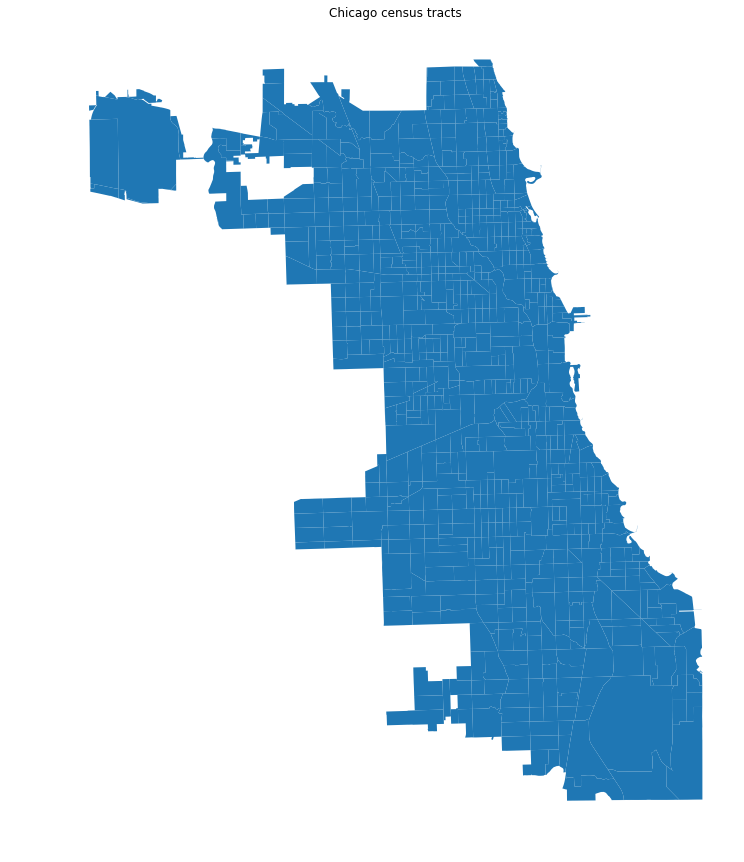

In [14]:
plt.rcParams["figure.figsize"] = [15,15]
chicagoCT.plot()
plt.title('Chicago census tracts')
plt.axis('off')
plt.show()

In [15]:
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,name,objectid,shape_area,shape_len,geometry
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,+41.8027454,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,..."
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,+41.7621978,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,..."
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,+41.7644133,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,..."
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,+41.7607500,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,..."
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,+41.7643139,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,..."


In [16]:
chicagoCT.shape

(857, 17)

**Select TNC and taxi trips based on their weekday and weekend peak hour (Wednesday and Saturday)**

In [17]:
tncWeekdayPeak = tncData[(tncData['StartDateTime'] >= '2018-11-07 17:00:00') & (tncData['StartDateTime'] < '2018-11-07 18:00:00')]

In [18]:
tncWeekdayPeak.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,StartDateTime,EndDateTime
2184,06c3f91590e2514551b871df15bd3f3f12589a83,11/07/2018 05:15:00 PM,11/07/2018 06:00:00 PM,2042.0,12.4,NaN,1.703184e+10,NaN,44.0,22.5,...,False,1,NaN,NaN,NaN,41.742488,-87.630045,POINT (-87.6300448953 41.7424875717),2018-11-07 17:15:00,2018-11-07 18:00:00
2611,0907f260a2dc6377c6845134dd0677f1d885160f,11/07/2018 05:15:00 PM,11/07/2018 05:45:00 PM,1965.0,19.4,NaN,1.703198e+10,NaN,76.0,27.5,...,False,1,NaN,NaN,NaN,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2018-11-07 17:15:00,2018-11-07 17:45:00
6335,201d44b5b0d2bfe7a92d117a8311fc0ec37ec441,11/07/2018 05:00:00 PM,11/07/2018 05:30:00 PM,1139.0,11.5,NaN,NaN,76.0,NaN,17.5,...,False,1,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN,2018-11-07 17:00:00,2018-11-07 17:30:00
8487,2e4cbd22a24c2fbb83f75dc0be1afd46d0d8a7e0,11/07/2018 05:00:00 PM,11/07/2018 05:45:00 PM,2920.0,10.6,NaN,NaN,2.0,NaN,20.0,...,True,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),NaN,NaN,NaN,2018-11-07 17:00:00,2018-11-07 17:45:00
9482,349a7319a0796b2b86e05a405e118217ed557c4e,11/07/2018 05:30:00 PM,11/07/2018 06:00:00 PM,1487.0,13.0,1.703198e+10,NaN,76.0,NaN,20.0,...,False,1,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN,2018-11-07 17:30:00,2018-11-07 18:00:00


In [19]:
tncWeekdayPeak.shape

(17425, 23)

In [20]:
taxiWeekdayPeak = taxiData[(taxiData['StartDateTime'] >= '2016-11-09 18:00:00') & (taxiData['StartDateTime'] < '2016-11-09 19:00:00')]

In [21]:
taxiWeekdayPeak.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,StartDateTime,EndDateTime
435894,7523fe185136debdf4dc8050ed5f2db14502494b,d38a242610110db56d50433ee978b21d989c43fd63cc98...,11/09/2016 06:00:00 PM,11/09/2016 06:00:00 PM,300.0,0.4,NaN,NaN,NaN,NaN,...,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-09 18:00:00,2016-11-09 18:00:00
435895,a97686ee780b89c9cfd89f99ed33c00653a42869,5bc4fb505b377f571a14166c27aeee000fbf3769630eda...,11/09/2016 06:00:00 PM,11/09/2016 06:00:00 PM,0.0,0.0,NaN,NaN,2.0,2.0,...,Credit Card,NaN,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2016-11-09 18:00:00,2016-11-09 18:00:00
435896,30b57a67ef5db6faa3d8a47e2d682870c3ef3a83,f7b3881bae139702c0198535ff8fd725cf0f3f95872204...,11/09/2016 06:00:00 PM,11/09/2016 06:00:00 PM,600.0,0.0,1.703184e+10,1.703184e+10,32.0,32.0,...,Cash,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2016-11-09 18:00:00,2016-11-09 18:00:00
435904,2a06c330ef84b2f6c05028033a249c1b08a75145,0dbad465512058f7f0a3c4633db7bcfd588be8b0569cc7...,11/09/2016 06:00:00 PM,11/09/2016 06:00:00 PM,360.0,0.4,1.703184e+10,1.703132e+10,32.0,32.0,...,Cash,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),2016-11-09 18:00:00,2016-11-09 18:00:00
435908,3709e742855fb9098033a781f97e5254a540901f,7ebc0131e37b5de496a799105e161e918b6b965238885e...,11/09/2016 06:00:00 PM,11/09/2016 06:00:00 PM,0.0,0.0,NaN,NaN,NaN,NaN,...,Cash,Taxi Affiliation Services,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-09 18:00:00,2016-11-09 18:00:00


In [22]:
taxiWeekdayPeak.shape

(3233, 25)

In [23]:
tncWeekendPeak = tncData[(tncData['StartDateTime'] >= '2018-11-10 23:00:00') & (tncData['StartDateTime'] < '2018-11-11 00:00:00')]

In [24]:
tncWeekendPeak.head()

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,StartDateTime,EndDateTime
1848,050c3d8b4244601175837e990daef1e00436f7e3,11/10/2018 11:15:00 PM,11/11/2018 12:00:00 AM,2235.0,19.0,NaN,NaN,NaN,66.0,27.5,...,False,1,NaN,NaN,NaN,41.771849,-87.695666,POINT (-87.695666342 41.7718485152),2018-11-10 23:15:00,2018-11-11 00:00:00
2854,0a83de781474a3ec3cc23642f03a500c02f7ab44,11/10/2018 11:00:00 PM,11/10/2018 11:45:00 PM,2555.0,34.4,NaN,1.703184e+10,NaN,24.0,42.5,...,False,1,NaN,NaN,NaN,41.898306,-87.653614,POINT (-87.6536139825 41.8983058696),2018-11-10 23:00:00,2018-11-10 23:45:00
4418,139b83c701d1d131ece47bf46a2a7aa9eba598e1,11/10/2018 11:45:00 PM,11/10/2018 11:45:00 PM,431.0,1.7,NaN,NaN,2.0,NaN,5.0,...,False,1,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),NaN,NaN,NaN,2018-11-10 23:45:00,2018-11-10 23:45:00
4596,14a4efe0dd9d4e1dc7853fdacf928f166cd78099,11/10/2018 11:45:00 PM,11/11/2018 12:15:00 AM,2115.0,24.4,1.703174e+10,NaN,74.0,NaN,32.5,...,False,1,41.697269,-87.698582,POINT (-87.6985820537 41.6972691922),NaN,NaN,NaN,2018-11-10 23:45:00,2018-11-11 00:15:00
5914,1d10bf2c26a8f5b781dface1e36180f67257503f,11/10/2018 11:45:00 PM,11/11/2018 12:00:00 AM,1097.0,6.8,NaN,NaN,62.0,NaN,12.5,...,False,1,41.792982,-87.724208,POINT (-87.7242081939 41.7929819032),NaN,NaN,NaN,2018-11-10 23:45:00,2018-11-11 00:00:00


In [25]:
tncWeekendPeak.shape

(24810, 23)

In [26]:
taxiWeekendPeak = taxiData[(taxiData['StartDateTime'] >= '2016-11-12 19:00:00') & (taxiData['StartDateTime'] < '2016-11-12 20:00:00')]

In [27]:
taxiWeekendPeak.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,StartDateTime,EndDateTime
580571,cec1dddeb5c5511a9d6c4793bd90f59d219457c4,bab9f72c23fb8c0e0cdbbdf97b0d978b9f9cb6d731acaa...,11/12/2016 07:00:00 PM,11/12/2016 07:00:00 PM,540.0,1.10,1.703108e+10,1.703132e+10,8.0,32.0,...,Cash,NaN,41.898332,-87.620763,POINT (-87.6207628651 41.8983317935),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),2016-11-12 19:00:00,2016-11-12 19:00:00
580573,eb297e5edcad4a209dc1b09268c691e0a21e21c5,faf9edb027f7718349ba31b94b6e146443f3e0486400f7...,11/12/2016 07:00:00 PM,11/12/2016 07:00:00 PM,240.0,0.00,1.703184e+10,1.703133e+10,33.0,33.0,...,Cash,Blue Ribbon Taxi Association Inc.,41.849247,-87.624135,POINT (-87.6241352979 41.8492467545),41.859350,-87.617358,POINT (-87.6173580061 41.859349715),2016-11-12 19:00:00,2016-11-12 19:00:00
580577,ce7a029e56262bb0b2c02c6836a86ea281d53bb5,9329ed84930ef60622b0e9bf10745816a941e22908309b...,11/12/2016 07:00:00 PM,11/12/2016 07:00:00 PM,300.0,0.62,1.703108e+10,1.703108e+10,8.0,8.0,...,Cash,NaN,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.900266,-87.632109,POINT (-87.6321092196 41.9002656868),2016-11-12 19:00:00,2016-11-12 19:00:00
580579,ce66276ace4f5571becd6777d9c0b75deaf7519e,5c4dbf120a97d6d82d93388ef3ec44ea96fff151a5f179...,11/12/2016 07:00:00 PM,11/12/2016 07:00:00 PM,480.0,1.50,1.703108e+10,1.703108e+10,8.0,8.0,...,Cash,Choice Taxi Association,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),2016-11-12 19:00:00,2016-11-12 19:00:00
580581,ce2e72f4f197e7e76b409a8ea77897293e821e4c,dc45a54b6ba04f8e92435b925b709a1c6ba222f9f9c302...,11/12/2016 07:00:00 PM,11/12/2016 07:00:00 PM,540.0,1.30,1.703108e+10,1.703108e+10,8.0,8.0,...,Cash,NaN,41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),41.891972,-87.612945,POINT (-87.6129454143 41.8919715078),2016-11-12 19:00:00,2016-11-12 19:00:00


In [28]:
taxiWeekendPeak.shape

(2831, 25)

**Merging peak hour data with Chicago census tracts**

In [29]:
len(tncWeekdayPeak[tncWeekdayPeak['Pickup Census Tract'].isnull()])

4045

In [30]:
tncWeekdayPeak_Pivot = tncWeekdayPeak.pivot_table(index='Pickup Census Tract', values='Trip ID', aggfunc='count')
tncWeekdayPeak_Pivot.reset_index(inplace=True)
tncWeekdayPeak_Pivot['Pickup Census Tract'] = tncWeekdayPeak_Pivot['Pickup Census Tract'].astype('int').astype('str')
tncWeekdayPeak_Pivot.head()

,Pickup Census Tract,Trip ID
0,17031010100,13
1,17031010201,2
2,17031010202,11
3,17031010300,13
4,17031010400,14


In [31]:
tncWeekdayPeak_Pivot['Trip ID'].sum()

13380

In [32]:
chicagoCT = pd.merge(chicagoCT, tncWeekdayPeak_Pivot, how='left', left_on='GEOID', right_on='Pickup Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "TNC_wdayPeak_Pickups"})
chicagoCT = chicagoCT.drop(['Pickup Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,name,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,+41.8027454,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,+41.7621978,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,+41.7644133,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,+41.7607500,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,+41.7643139,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN


In [33]:
chicagoCT['TNC_wdayPeak_Pickups'].sum()

13372.0

In [34]:
len(tncWeekdayPeak[tncWeekdayPeak['Dropoff Census Tract'].isnull()])

4038

In [35]:
tncWeekdayPeak_Pivot = tncWeekdayPeak.pivot_table(index='Dropoff Census Tract', values='Trip ID', aggfunc='count')
tncWeekdayPeak_Pivot.reset_index(inplace=True)
tncWeekdayPeak_Pivot['Dropoff Census Tract'] = tncWeekdayPeak_Pivot['Dropoff Census Tract'].astype('int').astype('str')
tncWeekdayPeak_Pivot.head()

,Dropoff Census Tract,Trip ID
0,17031010100,14
1,17031010201,5
2,17031010202,9
3,17031010300,8
4,17031010400,12


In [36]:
tncWeekdayPeak_Pivot['Trip ID'].sum()

13387

In [37]:
chicagoCT = pd.merge(chicagoCT, tncWeekdayPeak_Pivot, how='left', left_on='GEOID', right_on='Dropoff Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "TNC_wdayPeak_Dropoffs"})
chicagoCT = chicagoCT.drop(['Dropoff Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,name,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,+41.8027454,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,+41.7621978,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,+41.7644133,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,+41.7607500,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,+41.7643139,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0


In [38]:
chicagoCT['TNC_wdayPeak_Dropoffs'].sum()

13376.0

In [39]:
len(tncWeekendPeak[tncWeekendPeak['Pickup Census Tract'].isnull()])

3728

In [40]:
tncWeekendPeak_Pivot = tncWeekendPeak.pivot_table(index='Pickup Census Tract', values='Trip ID', aggfunc='count')
tncWeekendPeak_Pivot.reset_index(inplace=True)
tncWeekendPeak_Pivot['Pickup Census Tract'] = tncWeekendPeak_Pivot['Pickup Census Tract'].astype('int').astype('str')
tncWeekendPeak_Pivot.head()

,Pickup Census Tract,Trip ID
0,17031010100,4
1,17031010201,11
2,17031010202,11
3,17031010300,16
4,17031010400,34


In [41]:
tncWeekendPeak_Pivot['Trip ID'].sum()

21082

In [42]:
chicagoCT = pd.merge(chicagoCT, tncWeekendPeak_Pivot, how='left', left_on='GEOID', right_on='Pickup Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "TNC_wendPeak_Pickups"})
chicagoCT = chicagoCT.drop(['Pickup Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,name,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,+41.8027454,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,+41.7621978,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,+41.7644133,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,+41.7607500,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,+41.7643139,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0


In [43]:
chicagoCT['TNC_wendPeak_Pickups'].sum()

21050.0

In [44]:
len(tncWeekendPeak[tncWeekendPeak['Dropoff Census Tract'].isnull()])

4142

In [45]:
tncWeekendPeak_Pivot = tncWeekendPeak.pivot_table(index='Dropoff Census Tract', values='Trip ID', aggfunc='count')
tncWeekendPeak_Pivot.reset_index(inplace=True)
tncWeekendPeak_Pivot['Dropoff Census Tract'] = tncWeekendPeak_Pivot['Dropoff Census Tract'].astype('int').astype('str')
tncWeekendPeak_Pivot.head()

,Dropoff Census Tract,Trip ID
0,17031010100,18
1,17031010201,12
2,17031010202,5
3,17031010300,24
4,17031010400,51


In [46]:
tncWeekendPeak_Pivot['Trip ID'].sum()

20668

In [47]:
chicagoCT = pd.merge(chicagoCT, tncWeekendPeak_Pivot, how='left', left_on='GEOID', right_on='Dropoff Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "TNC_wendPeak_Dropoffs"})
chicagoCT = chicagoCT.drop(['Dropoff Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,INTPTLON,name,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups,TNC_wendPeak_Dropoffs
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN,2.0
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0,4.0


In [48]:
chicagoCT['TNC_wendPeak_Dropoffs'].sum()

20651.0

In [49]:
len(taxiWeekdayPeak[taxiWeekdayPeak['Pickup Census Tract'].isnull()])

937

In [50]:
taxiWeekdayPeak_Pivot = taxiWeekdayPeak.pivot_table(index='Pickup Census Tract', values='Trip ID', aggfunc='count')
taxiWeekdayPeak_Pivot.reset_index(inplace=True)
taxiWeekdayPeak_Pivot['Pickup Census Tract'] = taxiWeekdayPeak_Pivot['Pickup Census Tract'].astype('int').astype('str')
taxiWeekdayPeak_Pivot.head()

,Pickup Census Tract,Trip ID
0,17031063200,3
1,17031063301,1
2,17031070101,4
3,17031071300,3
4,17031071400,4


In [51]:
taxiWeekdayPeak_Pivot['Trip ID'].sum()

2296

In [52]:
chicagoCT = pd.merge(chicagoCT, taxiWeekdayPeak_Pivot, how='left', left_on='GEOID', right_on='Pickup Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "taxi_wdayPeak_Pickups"})
chicagoCT = chicagoCT.drop(['Pickup Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,name,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups,TNC_wendPeak_Dropoffs,taxi_wdayPeak_Pickups
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN,2.0,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0,4.0,NaN


In [53]:
chicagoCT['taxi_wdayPeak_Pickups'].sum()

2296.0

In [54]:
len(taxiWeekdayPeak[taxiWeekdayPeak['Dropoff Census Tract'].isnull()])

958

In [55]:
taxiWeekdayPeak_Pivot = taxiWeekdayPeak.pivot_table(index='Dropoff Census Tract', values='Trip ID', aggfunc='count')
taxiWeekdayPeak_Pivot.reset_index(inplace=True)
taxiWeekdayPeak_Pivot['Dropoff Census Tract'] = taxiWeekdayPeak_Pivot['Dropoff Census Tract'].astype('int').astype('str')
taxiWeekdayPeak_Pivot.head()

,Dropoff Census Tract,Trip ID
0,17031020701,1
1,17031031200,2
2,17031031400,7
3,17031040900,1
4,17031060800,1


In [56]:
taxiWeekdayPeak_Pivot['Trip ID'].sum()

2275

In [57]:
chicagoCT = pd.merge(chicagoCT, taxiWeekdayPeak_Pivot, how='left', left_on='GEOID', right_on='Dropoff Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "taxi_wdayPeak_Dropoffs"})
chicagoCT = chicagoCT.drop(['Dropoff Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,objectid,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups,TNC_wendPeak_Dropoffs,taxi_wdayPeak_Pickups,taxi_wdayPeak_Dropoffs
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN,NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN,2.0,NaN,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN,NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN,NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0,4.0,NaN,NaN


In [58]:
chicagoCT['taxi_wdayPeak_Dropoffs'].sum()

2273.0

In [59]:
len(taxiWeekendPeak[taxiWeekendPeak['Pickup Census Tract'].isnull()])

946

In [60]:
taxiWeekendPeak_Pivot = taxiWeekendPeak.pivot_table(index='Pickup Census Tract', values='Trip ID', aggfunc='count')
taxiWeekendPeak_Pivot.reset_index(inplace=True)
taxiWeekendPeak_Pivot['Pickup Census Tract'] = taxiWeekendPeak_Pivot['Pickup Census Tract'].astype('int').astype('str')
taxiWeekendPeak_Pivot.head()

,Pickup Census Tract,Trip ID
0,17031030500,1
1,17031031400,3
2,17031031502,2
3,17031032100,2
4,17031040402,2


In [61]:
taxiWeekendPeak_Pivot['Trip ID'].sum()

1885

In [62]:
chicagoCT = pd.merge(chicagoCT, taxiWeekendPeak_Pivot, how='left', left_on='GEOID', right_on='Pickup Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "taxi_wendPeak_Pickups"})
chicagoCT = chicagoCT.drop(['Pickup Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,shape_area,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups,TNC_wendPeak_Dropoffs,taxi_wdayPeak_Pickups,taxi_wdayPeak_Dropoffs,taxi_wendPeak_Pickups
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0,4.0,NaN,NaN,NaN


In [63]:
chicagoCT['taxi_wendPeak_Pickups'].sum()

1885.0

In [64]:
len(taxiWeekendPeak[taxiWeekendPeak['Dropoff Census Tract'].isnull()])

942

In [65]:
taxiWeekendPeak_Pivot = taxiWeekendPeak.pivot_table(index='Dropoff Census Tract', values='Trip ID', aggfunc='count')
taxiWeekendPeak_Pivot.reset_index(inplace=True)
taxiWeekendPeak_Pivot['Dropoff Census Tract'] = taxiWeekendPeak_Pivot['Dropoff Census Tract'].astype('int').astype('str')
taxiWeekendPeak_Pivot.head()

,Dropoff Census Tract,Trip ID
0,17031020602,2
1,17031030701,2
2,17031030703,2
3,17031030900,1
4,17031031200,6


In [66]:
taxiWeekendPeak_Pivot['Trip ID'].sum()

1889

In [67]:
chicagoCT = pd.merge(chicagoCT, taxiWeekendPeak_Pivot, how='left', left_on='GEOID', right_on='Dropoff Census Tract')
chicagoCT = chicagoCT.rename(index=str, columns={"Trip ID": "taxi_wendPeak_Dropoffs"})
chicagoCT = chicagoCT.drop(['Dropoff Census Tract'], axis=1)
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,shape_len,geometry,TNC_wdayPeak_Pickups,TNC_wdayPeak_Dropoffs,TNC_wendPeak_Pickups,TNC_wendPeak_Dropoffs,taxi_wdayPeak_Pickups,taxi_wdayPeak_Dropoffs,taxi_wendPeak_Pickups,taxi_wendPeak_Dropoffs
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",NaN,1.0,2.0,4.0,NaN,NaN,NaN,NaN


In [68]:
chicagoCT['taxi_wendPeak_Dropoffs'].sum()

1889.0

**Creating choropleth maps of peak pickups and dropoffs for TNCs and Taxis, weekdays and weekend peak hours**

In [69]:
chicagoCT = chicagoCT.fillna(0)

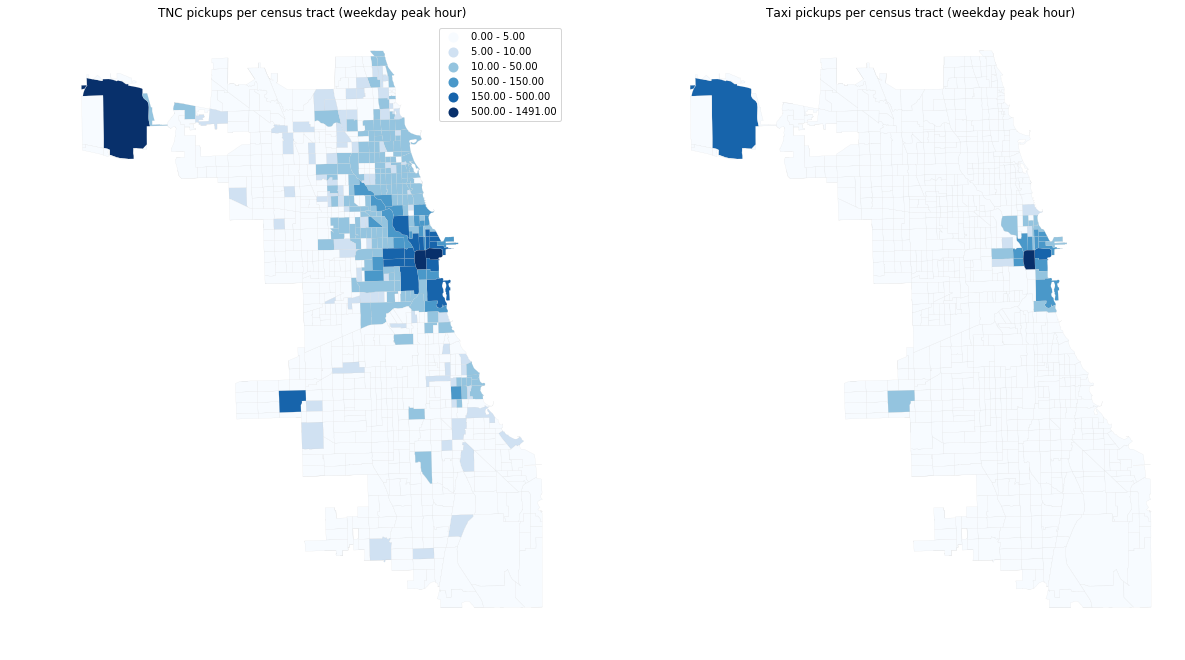

In [70]:
bins = {'bins':[5, 10, 50, 150, 500], 'k':5}
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = chicagoCT.plot(ax=ax1, column='TNC_wdayPeak_Pickups', legend=True, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax2 = chicagoCT.plot(ax=ax2, column='taxi_wdayPeak_Pickups', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('TNC pickups per census tract (weekday peak hour)')
ax2.title.set_text('Taxi pickups per census tract (weekday peak hour)')

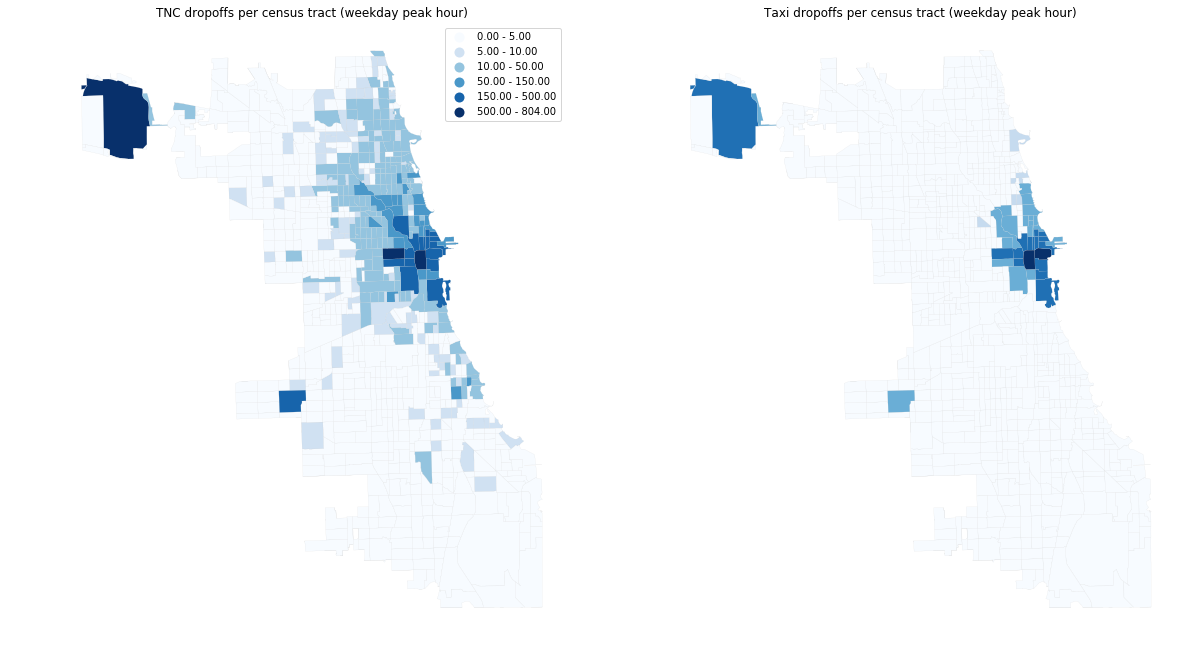

In [71]:
bins = {'bins':[5, 10, 50, 150, 500], 'k':5}
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = chicagoCT.plot(ax=ax1, column='TNC_wdayPeak_Dropoffs', legend=True, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax2 = chicagoCT.plot(ax=ax2, column='taxi_wdayPeak_Dropoffs', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('TNC dropoffs per census tract (weekday peak hour)')
ax2.title.set_text('Taxi dropoffs per census tract (weekday peak hour)')

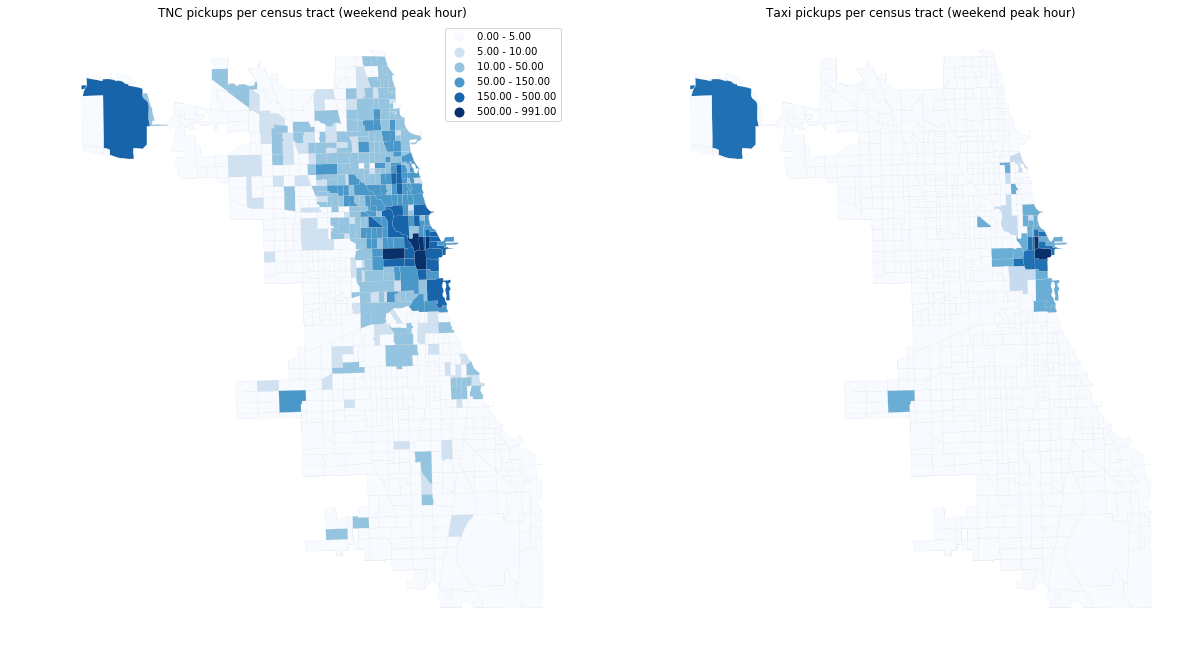

In [72]:
bins = {'bins':[5, 10, 50, 150, 500], 'k':5}
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = chicagoCT.plot(ax=ax1, column='TNC_wendPeak_Pickups', legend=True, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax2 = chicagoCT.plot(ax=ax2, column='taxi_wendPeak_Pickups', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('TNC pickups per census tract (weekend peak hour)')
ax2.title.set_text('Taxi pickups per census tract (weekend peak hour)')

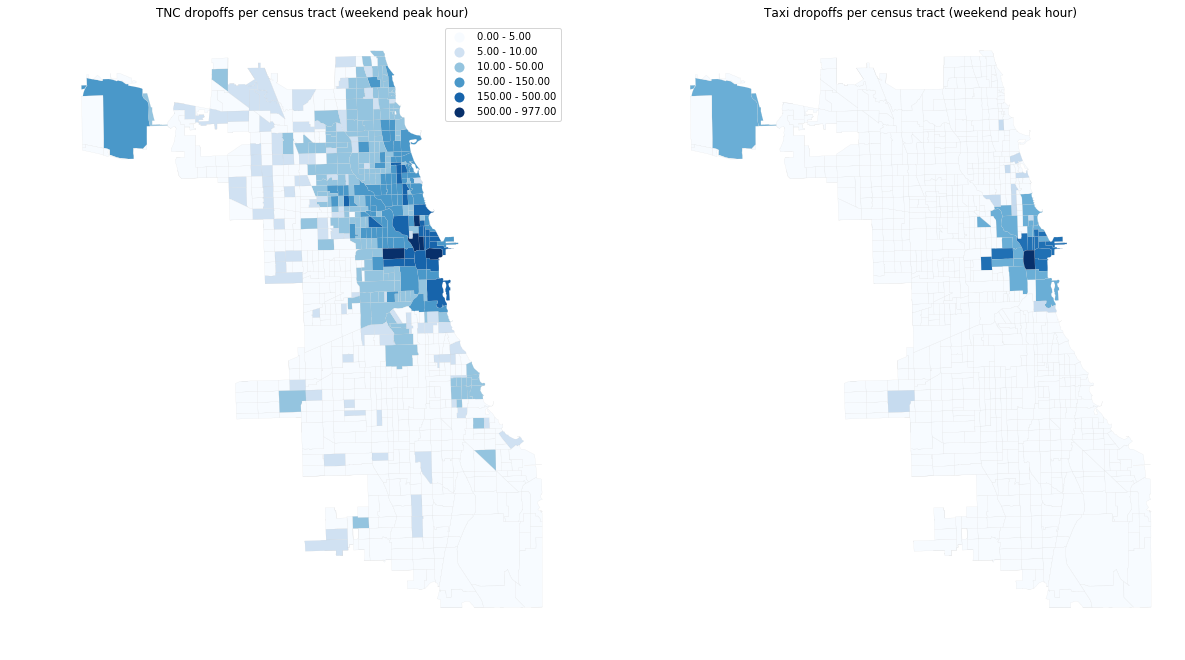

In [73]:
bins = {'bins':[5, 10, 50, 150, 500], 'k':5}
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax1 = chicagoCT.plot(ax=ax1, column='TNC_wendPeak_Dropoffs', legend=True, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax2 = chicagoCT.plot(ax=ax2, column='taxi_wendPeak_Dropoffs', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax1.axis('off')
ax2.axis('off')
ax1.title.set_text('TNC dropoffs per census tract (weekend peak hour)')
ax2.title.set_text('Taxi dropoffs per census tract (weekend peak hour)')

### Performing Local Moran's I Analysis
(following [this tutorial](http://darribas.org/gds18/content/labs/lab_06.html))

**Spatial weights matrix**

In [74]:
w = ps.lib.weights.Queen.from_dataframe(chicagoCT)
w[0]

{80: 1.0, 33: 1.0, 81: 1.0, 714: 1.0, 58: 1.0, 556: 1.0}

In [75]:
w.transform = 'R'
w[0]

{80: 0.16666666666666666,
 33: 0.16666666666666666,
 81: 0.16666666666666666,
 714: 0.16666666666666666,
 58: 0.16666666666666666,
 556: 0.16666666666666666}

**Spatial lag**

In [76]:
# TNCs
chicagoCT['w_TNC_wdayPeak_Pickups'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wdayPeak_Pickups'])
chicagoCT['w_TNC_wdayPeak_Dropoffs'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wdayPeak_Dropoffs'])
chicagoCT['w_TNC_wendPeak_Pickups'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wendPeak_Pickups'])
chicagoCT['w_TNC_wendPeak_Dropoffs'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wendPeak_Dropoffs'])
# Taxis
chicagoCT['w_taxi_wdayPeak_Pickups'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wdayPeak_Pickups'])
chicagoCT['w_taxi_wdayPeak_Dropoffs'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wdayPeak_Dropoffs'])
chicagoCT['w_taxi_wendPeak_Pickups'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wendPeak_Pickups'])
chicagoCT['w_taxi_wendPeak_Dropoffs'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wendPeak_Dropoffs'])

In [77]:
chicagoCT[['TNC_wdayPeak_Pickups','w_TNC_wdayPeak_Pickups']].head(20)

,TNC_wdayPeak_Pickups,w_TNC_wdayPeak_Pickups
0,0.0,2.166667
1,0.0,3.000000
2,0.0,1.250000
3,0.0,0.428571
4,0.0,1.714286
5,0.0,0.166667
6,2.0,1.272727
7,0.0,3.000000
8,2.0,2.285714
9,2.0,0.375000


In [78]:
# Standarizing the values
# TNCs
chicagoCT['TNC_wdayPeak_Pickups_std'] = (chicagoCT['TNC_wdayPeak_Pickups'] - chicagoCT['TNC_wdayPeak_Pickups'].mean()) / chicagoCT['TNC_wdayPeak_Pickups'].std()
chicagoCT['TNC_wdayPeak_Dropoffs_std'] = (chicagoCT['TNC_wdayPeak_Dropoffs'] - chicagoCT['TNC_wdayPeak_Dropoffs'].mean()) / chicagoCT['TNC_wdayPeak_Dropoffs'].std()
chicagoCT['TNC_wendPeak_Pickups_std'] = (chicagoCT['TNC_wendPeak_Pickups'] - chicagoCT['TNC_wendPeak_Pickups'].mean()) / chicagoCT['TNC_wendPeak_Pickups'].std()
chicagoCT['TNC_wendPeak_Dropoffs_std'] = (chicagoCT['TNC_wendPeak_Dropoffs'] - chicagoCT['TNC_wendPeak_Dropoffs'].mean()) / chicagoCT['TNC_wendPeak_Dropoffs'].std()

# Taxis
chicagoCT['taxi_wdayPeak_Pickups_std'] = (chicagoCT['taxi_wdayPeak_Pickups'] - chicagoCT['taxi_wdayPeak_Pickups'].mean()) / chicagoCT['taxi_wdayPeak_Pickups'].std()
chicagoCT['taxi_wdayPeak_Dropoffs_std'] = (chicagoCT['taxi_wdayPeak_Dropoffs'] - chicagoCT['taxi_wdayPeak_Dropoffs'].mean()) / chicagoCT['taxi_wdayPeak_Dropoffs'].std()
chicagoCT['taxi_wendPeak_Pickups_std'] = (chicagoCT['taxi_wendPeak_Pickups'] - chicagoCT['taxi_wendPeak_Pickups'].mean()) / chicagoCT['taxi_wendPeak_Pickups'].std()
chicagoCT['taxi_wendPeak_Dropoffs_std'] = (chicagoCT['taxi_wendPeak_Dropoffs'] - chicagoCT['taxi_wendPeak_Dropoffs'].mean()) / chicagoCT['taxi_wendPeak_Dropoffs'].std()

In [79]:
# TNCs
chicagoCT['w_TNC_wdayPeak_Pickups_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wdayPeak_Pickups_std'])
chicagoCT['w_TNC_wdayPeak_Dropoffs_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wdayPeak_Dropoffs_std'])
chicagoCT['w_TNC_wendPeak_Pickups_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wendPeak_Pickups_std'])
chicagoCT['w_TNC_wendPeak_Dropoffs_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['TNC_wendPeak_Dropoffs_std'])

# Taxis
chicagoCT['w_taxi_wdayPeak_Pickups_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wdayPeak_Pickups_std'])
chicagoCT['w_taxi_wdayPeak_Dropoffs_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wdayPeak_Dropoffs_std'])
chicagoCT['w_taxi_wendPeak_Pickups_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wendPeak_Pickups_std'])
chicagoCT['w_taxi_wendPeak_Dropoffs_std'] = ps.lib.weights.lag_spatial(w, chicagoCT['taxi_wendPeak_Dropoffs_std'])

**Local spatial autocorrelation**

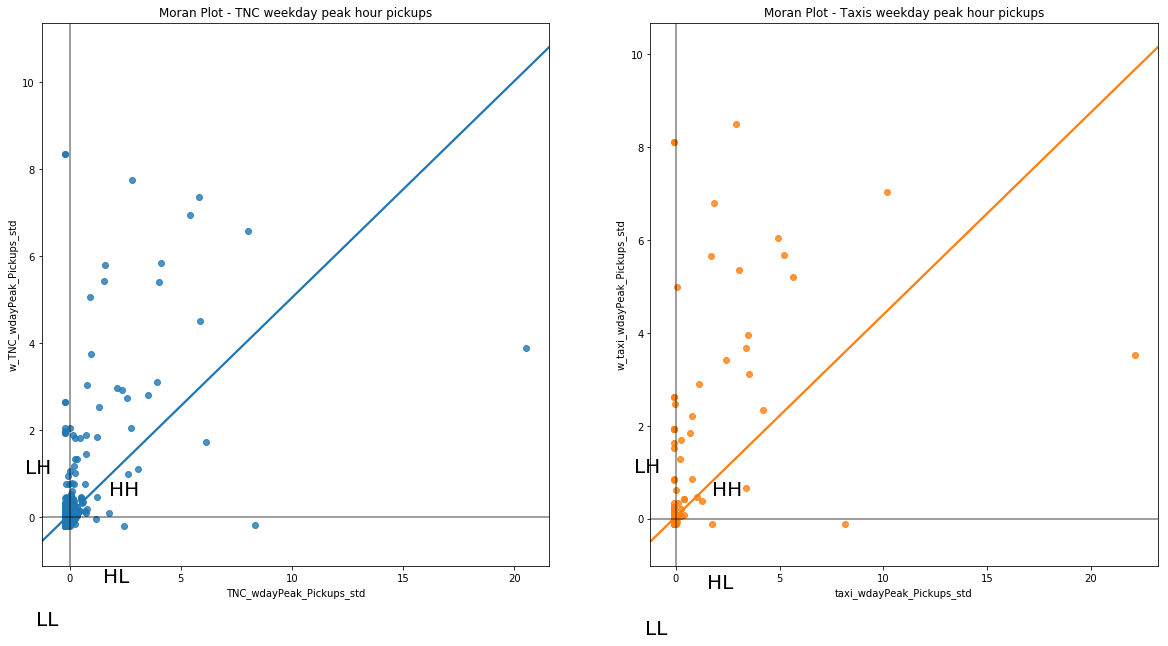

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1 = sns.regplot(ax=ax1, x='TNC_wdayPeak_Pickups_std', y='w_TNC_wdayPeak_Pickups_std', data=chicagoCT, ci=None)
ax2 = sns.regplot(ax=ax2, x='taxi_wdayPeak_Pickups_std', y='w_taxi_wdayPeak_Pickups_std', data=chicagoCT, ci=None)
ax1.axvline(0, c='k', alpha=0.5)
ax1.axhline(0, c='k', alpha=0.5)
ax1.text(1.75, 0.5, "HH", fontsize=20)
ax1.text(1.5, -1.5, "HL", fontsize=20)
ax1.text(-2, 1, "LH", fontsize=20)
ax1.text(-1.5, -2.5, "LL", fontsize=20)
ax2.axvline(0, c='k', alpha=0.5)
ax2.axhline(0, c='k', alpha=0.5)
ax2.text(1.75, 0.5, "HH", fontsize=20)
ax2.text(1.5, -1.5, "HL", fontsize=20)
ax2.text(-2, 1, "LH", fontsize=20)
ax2.text(-1.5, -2.5, "LL", fontsize=20)
ax1.title.set_text('Moran Plot - TNC weekday peak hour pickups')
ax2.title.set_text('Moran Plot - Taxis weekday peak hour pickups')

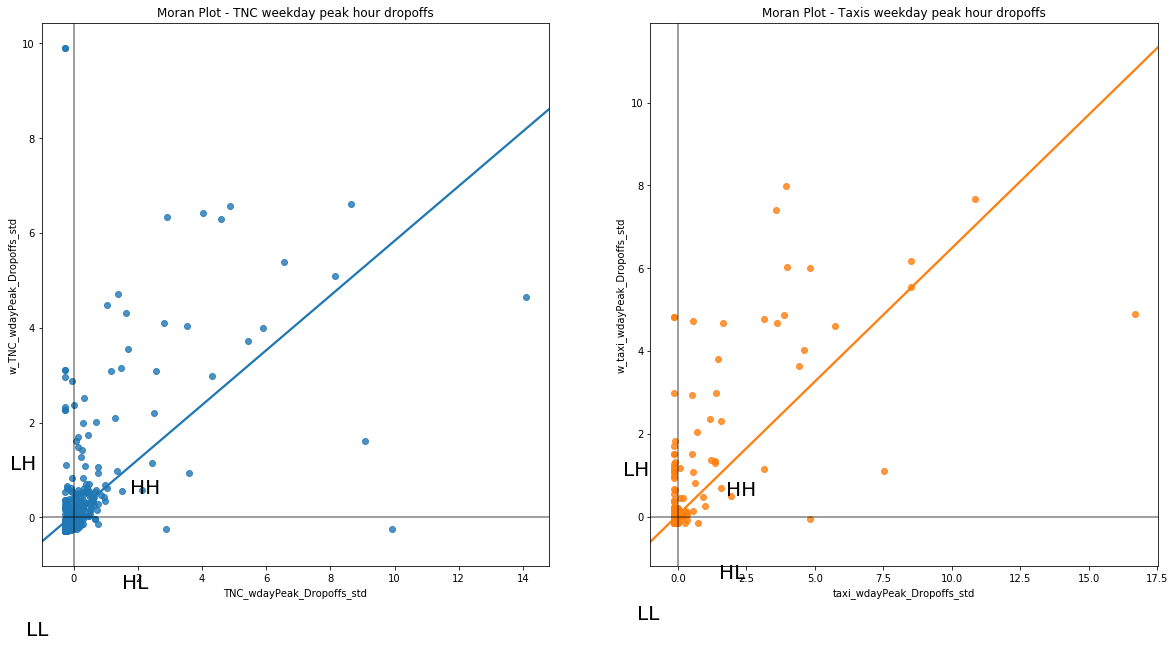

In [81]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1 = sns.regplot(ax=ax1, x='TNC_wdayPeak_Dropoffs_std', y='w_TNC_wdayPeak_Dropoffs_std', data=chicagoCT, ci=None)
ax2 = sns.regplot(ax=ax2, x='taxi_wdayPeak_Dropoffs_std', y='w_taxi_wdayPeak_Dropoffs_std', data=chicagoCT, ci=None)
ax1.axvline(0, c='k', alpha=0.5)
ax1.axhline(0, c='k', alpha=0.5)
ax1.text(1.75, 0.5, "HH", fontsize=20)
ax1.text(1.5, -1.5, "HL", fontsize=20)
ax1.text(-2, 1, "LH", fontsize=20)
ax1.text(-1.5, -2.5, "LL", fontsize=20)
ax2.axvline(0, c='k', alpha=0.5)
ax2.axhline(0, c='k', alpha=0.5)
ax2.text(1.75, 0.5, "HH", fontsize=20)
ax2.text(1.5, -1.5, "HL", fontsize=20)
ax2.text(-2, 1, "LH", fontsize=20)
ax2.text(-1.5, -2.5, "LL", fontsize=20)
ax1.title.set_text('Moran Plot - TNC weekday peak hour dropoffs')
ax2.title.set_text('Moran Plot - Taxis weekday peak hour dropoffs')

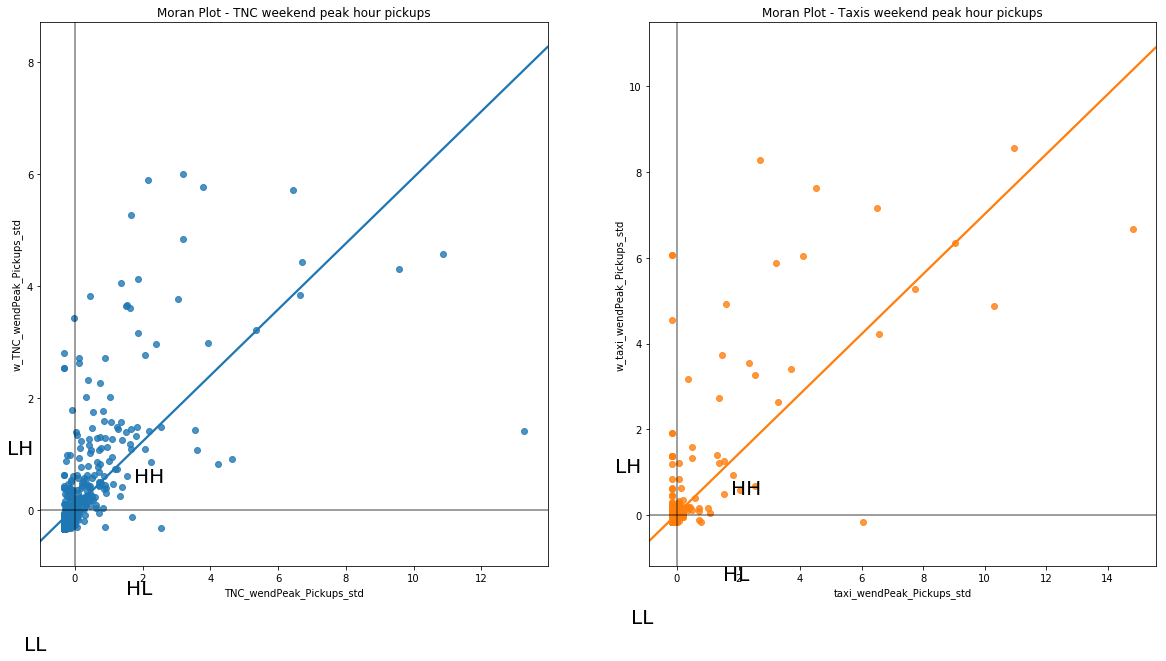

In [82]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1 = sns.regplot(ax=ax1, x='TNC_wendPeak_Pickups_std', y='w_TNC_wendPeak_Pickups_std', data=chicagoCT, ci=None)
ax2 = sns.regplot(ax=ax2, x='taxi_wendPeak_Pickups_std', y='w_taxi_wendPeak_Pickups_std', data=chicagoCT, ci=None)
ax1.axvline(0, c='k', alpha=0.5)
ax1.axhline(0, c='k', alpha=0.5)
ax1.text(1.75, 0.5, "HH", fontsize=20)
ax1.text(1.5, -1.5, "HL", fontsize=20)
ax1.text(-2, 1, "LH", fontsize=20)
ax1.text(-1.5, -2.5, "LL", fontsize=20)
ax2.axvline(0, c='k', alpha=0.5)
ax2.axhline(0, c='k', alpha=0.5)
ax2.text(1.75, 0.5, "HH", fontsize=20)
ax2.text(1.5, -1.5, "HL", fontsize=20)
ax2.text(-2, 1, "LH", fontsize=20)
ax2.text(-1.5, -2.5, "LL", fontsize=20)
ax1.title.set_text('Moran Plot - TNC weekend peak hour pickups')
ax2.title.set_text('Moran Plot - Taxis weekend peak hour pickups')

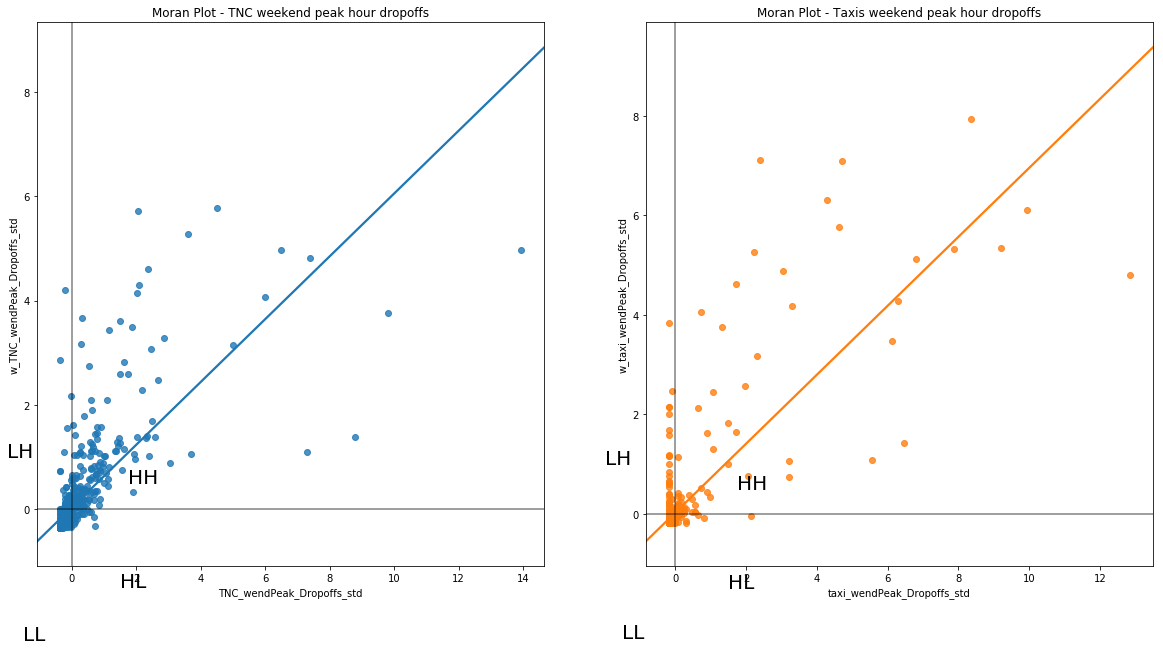

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax1 = sns.regplot(ax=ax1, x='TNC_wendPeak_Dropoffs_std', y='w_TNC_wendPeak_Dropoffs_std', data=chicagoCT, ci=None)
ax2 = sns.regplot(ax=ax2, x='taxi_wendPeak_Dropoffs_std', y='w_taxi_wendPeak_Dropoffs_std', data=chicagoCT, ci=None)
ax1.axvline(0, c='k', alpha=0.5)
ax1.axhline(0, c='k', alpha=0.5)
ax1.text(1.75, 0.5, "HH", fontsize=20)
ax1.text(1.5, -1.5, "HL", fontsize=20)
ax1.text(-2, 1, "LH", fontsize=20)
ax1.text(-1.5, -2.5, "LL", fontsize=20)
ax2.axvline(0, c='k', alpha=0.5)
ax2.axhline(0, c='k', alpha=0.5)
ax2.text(1.75, 0.5, "HH", fontsize=20)
ax2.text(1.5, -1.5, "HL", fontsize=20)
ax2.text(-2, 1, "LH", fontsize=20)
ax2.text(-1.5, -2.5, "LL", fontsize=20)
ax1.title.set_text('Moran Plot - TNC weekend peak hour dropoffs')
ax2.title.set_text('Moran Plot - Taxis weekend peak hour dropoffs')

In [84]:
# LISA (Local indicators of spatial association)
# Break observations into significant or not
# Store the quadrant they belong to

# TNCs
lisa = ps.explore.esda.Moran_Local(chicagoCT['TNC_wdayPeak_Pickups'], w)
chicagoCT['TNC_wdayPickups_sig'] = lisa.p_sim < 0.05
chicagoCT['TNC_wdayPickups_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['TNC_wdayPeak_Dropoffs'], w)
chicagoCT['TNC_wdayDropoffs_sig'] = lisa.p_sim < 0.05
chicagoCT['TNC_wdayDropoffs_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['TNC_wendPeak_Pickups'], w)
chicagoCT['TNC_wendPickups_sig'] = lisa.p_sim < 0.05
chicagoCT['TNC_wendPickups_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['TNC_wendPeak_Dropoffs'], w)
chicagoCT['TNC_wendDropoffs_sig'] = lisa.p_sim < 0.05
chicagoCT['TNC_wendDropoffs_quad'] = lisa.q

# Taxis
lisa = ps.explore.esda.Moran_Local(chicagoCT['taxi_wdayPeak_Pickups'], w)
chicagoCT['taxi_wdayPickups_sig'] = lisa.p_sim < 0.05
chicagoCT['taxi_wdayPickups_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['taxi_wdayPeak_Dropoffs'], w)
chicagoCT['taxi_wdayDropoffs_sig'] = lisa.p_sim < 0.05
chicagoCT['taxi_wdayDropoffs_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['taxi_wendPeak_Pickups'], w)
chicagoCT['taxi_wendPickups_sig'] = lisa.p_sim < 0.05
chicagoCT['taxi_wendPickups_quad'] = lisa.q
lisa = ps.explore.esda.Moran_Local(chicagoCT['taxi_wendPeak_Dropoffs'], w)
chicagoCT['taxi_wendDropoffs_sig'] = lisa.p_sim < 0.05
chicagoCT['taxi_wendDropoffs_quad'] = lisa.q

In [85]:
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TNC_wendDropoffs_sig,TNC_wendDropoffs_quad,taxi_wdayPickups_sig,taxi_wdayPickups_quad,taxi_wdayDropoffs_sig,taxi_wdayDropoffs_quad,taxi_wendPickups_sig,taxi_wendPickups_quad,taxi_wendDropoffs_sig,taxi_wendDropoffs_quad
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,True,3,True,3,False,3,False,3,False,3
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,False,3,True,3,False,3,False,3,False,3
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,True,3,True,3,False,3,False,3,False,3
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,True,3,True,3,False,3,False,3,False,3
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,False,3,True,3,False,3,False,3,False,3


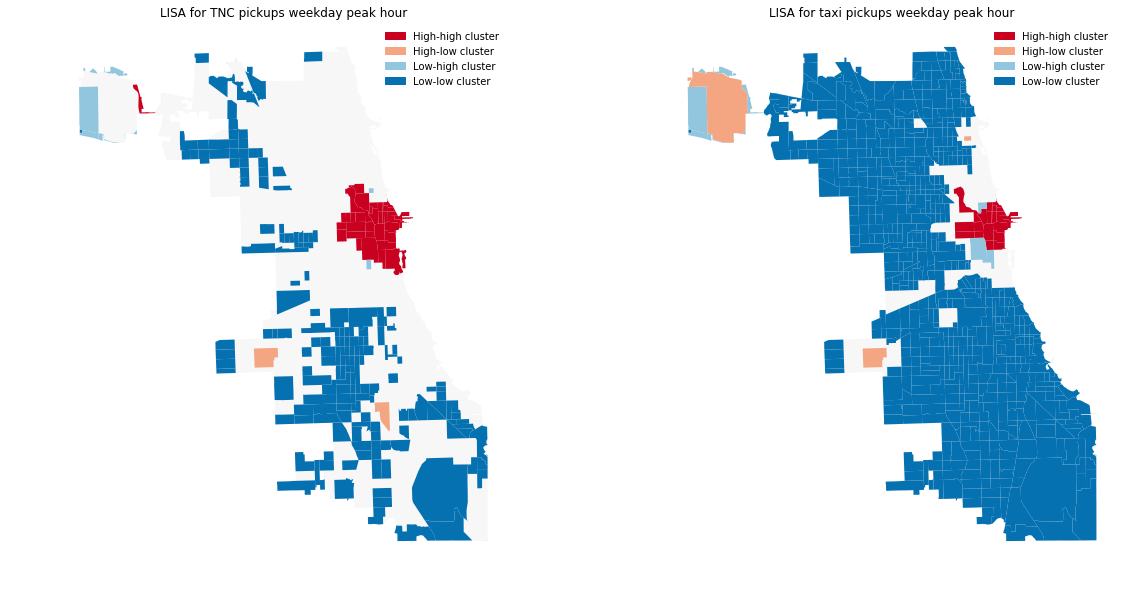

In [86]:
variable1 = 'TNC_wdayPickups'
variable2 = 'taxi_wdayPickups'

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
high_high = mpatches.Patch(color='#ca0020', label='High-high cluster')
high_low = mpatches.Patch(color='#f4a582', label='High-low cluster')
low_low = mpatches.Patch(color='#0571b0', label='Low-low cluster')
low_high = mpatches.Patch(color='#92c5de', label='Low-high cluster')
# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable1 + '_sig']==False, 'geometry']
ns.plot(ax=ax1, color='#f7f7f7', label='test')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==1) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hh.plot(ax=ax1, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==3) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
ll.plot(ax=ax1, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==2) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
lh.plot(ax=ax1, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==4) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hl.plot(ax=ax1, color='#f4a582')
# Style and draw
ax1.title.set_text('LISA for TNC pickups weekday peak hour')
ax1.set_axis_off()
ax1.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable2 + '_sig']==False, 'geometry',]
ns.plot(ax=ax2, color='#f7f7f7')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==1) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hh.plot(ax=ax2, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==3) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
ll.plot(ax=ax2, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==2) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
lh.plot(ax=ax2, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==4) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hl.plot(ax=ax2, color='#f4a582')
# Style and draw
ax2.title.set_text('LISA for taxi pickups weekday peak hour')
ax2.set_axis_off()
ax2.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:266: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


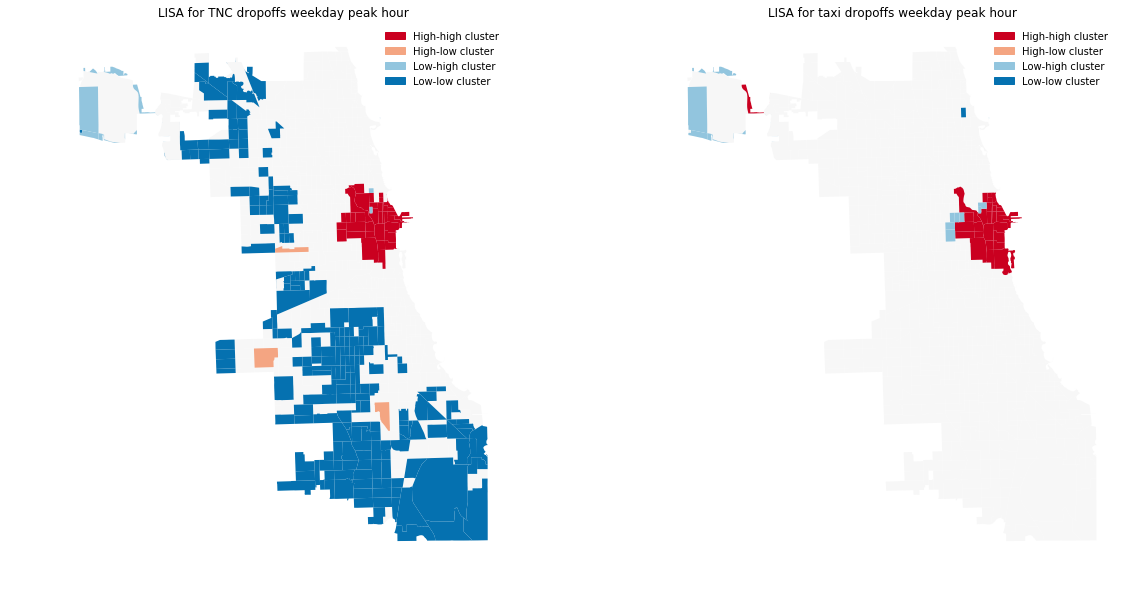

In [87]:
variable1 = 'TNC_wdayDropoffs'
variable2 = 'taxi_wdayDropoffs'

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
high_high = mpatches.Patch(color='#ca0020', label='High-high cluster')
high_low = mpatches.Patch(color='#f4a582', label='High-low cluster')
low_low = mpatches.Patch(color='#0571b0', label='Low-low cluster')
low_high = mpatches.Patch(color='#92c5de', label='Low-high cluster')
# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable1 + '_sig']==False, 'geometry']
ns.plot(ax=ax1, color='#f7f7f7', label='test')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==1) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hh.plot(ax=ax1, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==3) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
ll.plot(ax=ax1, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==2) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
lh.plot(ax=ax1, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==4) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hl.plot(ax=ax1, color='#f4a582')
# Style and draw
ax1.title.set_text('LISA for TNC dropoffs weekday peak hour')
ax1.set_axis_off()
ax1.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable2 + '_sig']==False, 'geometry',]
ns.plot(ax=ax2, color='#f7f7f7')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==1) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hh.plot(ax=ax2, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==3) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
ll.plot(ax=ax2, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==2) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
lh.plot(ax=ax2, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==4) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hl.plot(ax=ax2, color='#f4a582')
# Style and draw
ax2.title.set_text('LISA for taxi dropoffs weekday peak hour')
ax2.set_axis_off()
ax2.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:266: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


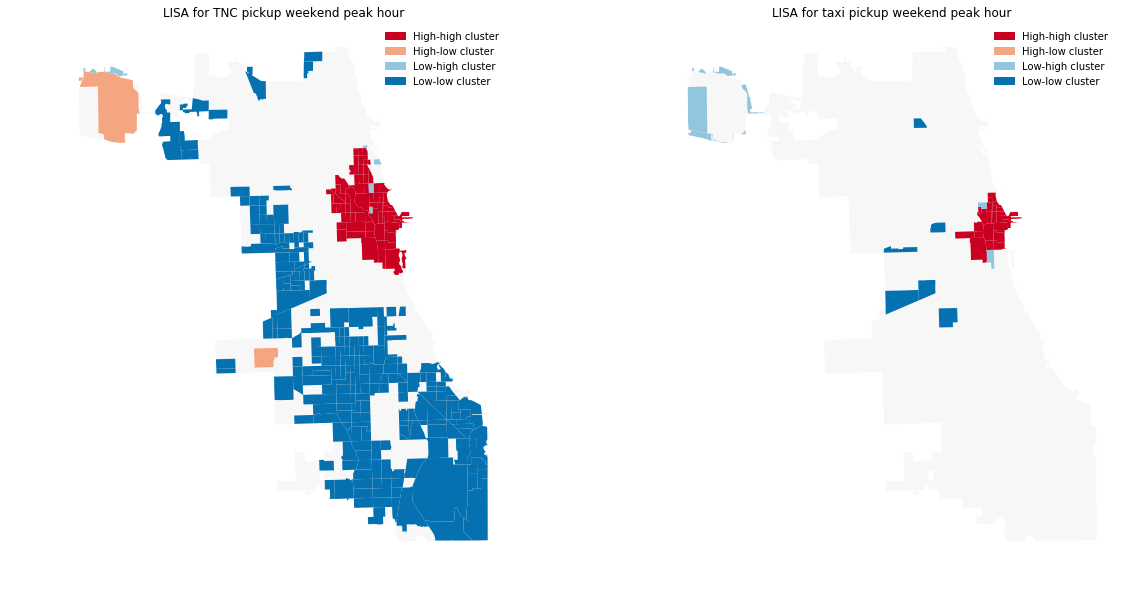

In [88]:
variable1 = 'TNC_wendPickups'
variable2 = 'taxi_wendPickups'

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
high_high = mpatches.Patch(color='#ca0020', label='High-high cluster')
high_low = mpatches.Patch(color='#f4a582', label='High-low cluster')
low_low = mpatches.Patch(color='#0571b0', label='Low-low cluster')
low_high = mpatches.Patch(color='#92c5de', label='Low-high cluster')
# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable1 + '_sig']==False, 'geometry']
ns.plot(ax=ax1, color='#f7f7f7', label='test')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==1) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hh.plot(ax=ax1, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==3) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
ll.plot(ax=ax1, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==2) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
lh.plot(ax=ax1, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==4) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hl.plot(ax=ax1, color='#f4a582')
# Style and draw
ax1.title.set_text('LISA for TNC pickup weekend peak hour')
ax1.set_axis_off()
ax1.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable2 + '_sig']==False, 'geometry',]
ns.plot(ax=ax2, color='#f7f7f7')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==1) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hh.plot(ax=ax2, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==3) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
ll.plot(ax=ax2, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==2) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
lh.plot(ax=ax2, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==4) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hl.plot(ax=ax2, color='#f4a582')
# Style and draw
ax2.title.set_text('LISA for taxi pickup weekend peak hour')
ax2.set_axis_off()
ax2.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:266: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


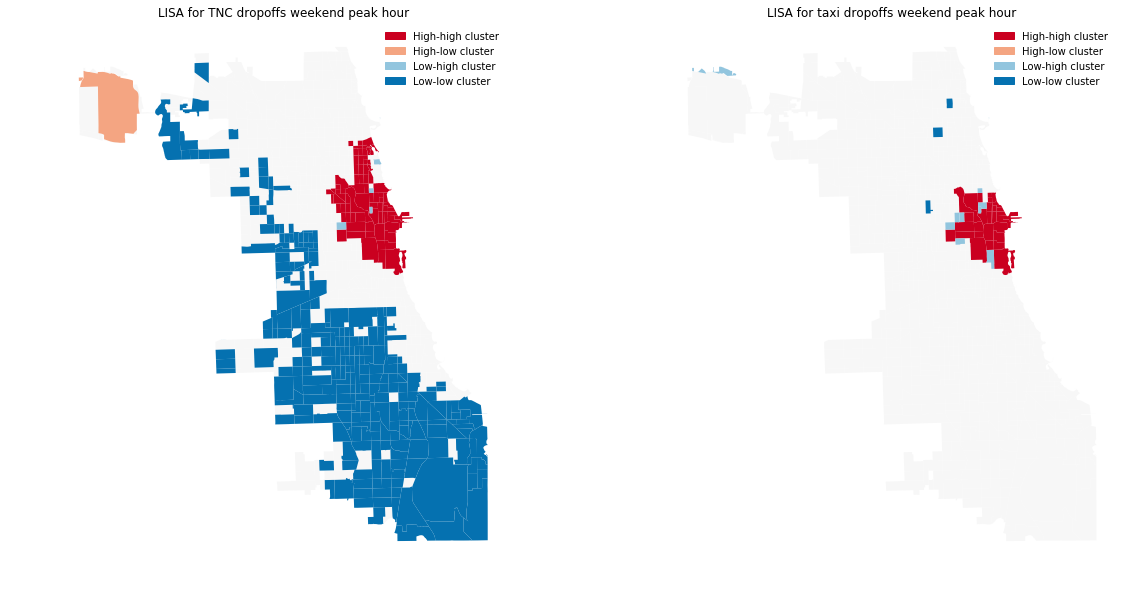

In [89]:
variable1 = 'TNC_wendDropoffs'
variable2 = 'taxi_wendDropoffs'

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
high_high = mpatches.Patch(color='#ca0020', label='High-high cluster')
high_low = mpatches.Patch(color='#f4a582', label='High-low cluster')
low_low = mpatches.Patch(color='#0571b0', label='Low-low cluster')
low_high = mpatches.Patch(color='#92c5de', label='Low-high cluster')
# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable1 + '_sig']==False, 'geometry']
ns.plot(ax=ax1, color='#f7f7f7', label='test')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==1) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hh.plot(ax=ax1, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==3) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
ll.plot(ax=ax1, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==2) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
lh.plot(ax=ax1, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable1 + '_quad']==4) & (chicagoCT[variable1 + '_sig']==True), 'geometry']
hl.plot(ax=ax1, color='#f4a582')
# Style and draw
ax1.title.set_text('LISA for TNC dropoffs weekend peak hour')
ax1.set_axis_off()
ax1.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

# Plot insignificant clusters
ns = chicagoCT.loc[chicagoCT[variable2 + '_sig']==False, 'geometry',]
ns.plot(ax=ax2, color='#f7f7f7')
# Plot HH clusters
hh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==1) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hh.plot(ax=ax2, color='#ca0020')
# Plot LL clusters
ll = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==3) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
ll.plot(ax=ax2, color='#0571b0')
# Plot LH clusters
lh = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==2) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
lh.plot(ax=ax2, color='#92c5de')
# Plot HL clusters
hl = chicagoCT.loc[(chicagoCT[variable2 + '_quad']==4) & (chicagoCT[variable2 + '_sig']==True), 'geometry']
hl.plot(ax=ax2, color='#f4a582')
# Style and draw
ax2.title.set_text('LISA for taxi dropoffs weekend peak hour')
ax2.set_axis_off()
ax2.legend(loc='upper right', frameon=False, handles=[high_high, high_low, low_high, low_low])

**Exporting shapefiles**

In [90]:
chicagoCT_toExport = chicagoCT

In [91]:
# TNCs
chicagoCT_toExport['TNC_wdayPickups_sig'] = chicagoCT_toExport['TNC_wdayPickups_sig'].astype('int')
chicagoCT_toExport['TNC_wdayDropoffs_sig'] = chicagoCT_toExport['TNC_wdayDropoffs_sig'].astype('int')
chicagoCT_toExport['TNC_wendPickups_sig'] = chicagoCT_toExport['TNC_wendPickups_sig'].astype('int')
chicagoCT_toExport['TNC_wendDropoffs_sig'] = chicagoCT_toExport['TNC_wendDropoffs_sig'].astype('int')

# taxis
chicagoCT_toExport['taxi_wdayPickups_sig'] = chicagoCT_toExport['taxi_wdayPickups_sig'].astype('int')
chicagoCT_toExport['taxi_wdayDropoffs_sig'] = chicagoCT_toExport['taxi_wdayDropoffs_sig'].astype('int')
chicagoCT_toExport['taxi_wendPickups_sig'] = chicagoCT_toExport['taxi_wendPickups_sig'].astype('int')
chicagoCT_toExport['taxi_wendDropoffs_sig'] = chicagoCT_toExport['taxi_wendDropoffs_sig'].astype('int')

In [92]:
chicagoCT_toExport.to_file(outputDataPath + 'ChicagoTNC_Taxi_Data.shp')